In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image_path = "                 "
img = cv2.imread(image_path)
image = cv2.resize(img, (1280, 720))

In [3]:
def bird_eye_view(image, src_mask, dst_mask):
    matrix = cv2.getPerspectiveTransform(src_mask, dst_mask)
    warped_img = cv2.warpPerspective(image, matrix, (image.shape[1], image.shape[0]))
    return warped_img, matrix

In [4]:
def binarize_image(image):
    _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return binary

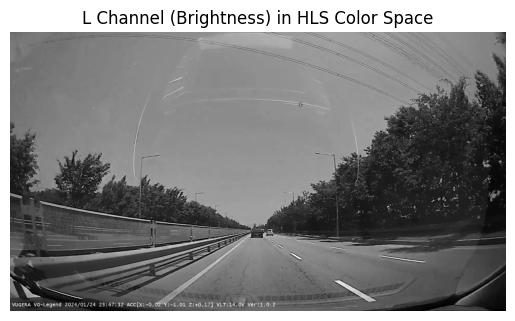

In [5]:
# Convert image to HLS color space
hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
# Extract the L channel (brightness) from HLS 
l_channel = hls[:, :, 1] 

plt.imshow(l_channel, cmap='gray')
plt.title('L Channel (Brightness) in HLS Color Space')
plt.axis('off')
plt.show()

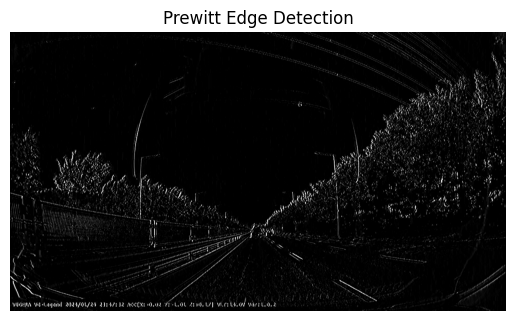

In [6]:
# Apply Prewitt edge detection along x-axis
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_edges = cv2.filter2D(l_channel, -1, kernelx)

plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')
plt.show()

In [7]:
# Initial setup for perspective transformation
top_left = (559, 556)
bottom_left = (374, 680)
top_right = (732, 555)
bottom_right = (943, 680)

src_mask = np.array([top_left, bottom_left, top_right, bottom_right], dtype=np.float32)
dst_mask = np.array([[0, 0], [0, 720], [1280, 0], [1280, 720]], dtype=np.float32)

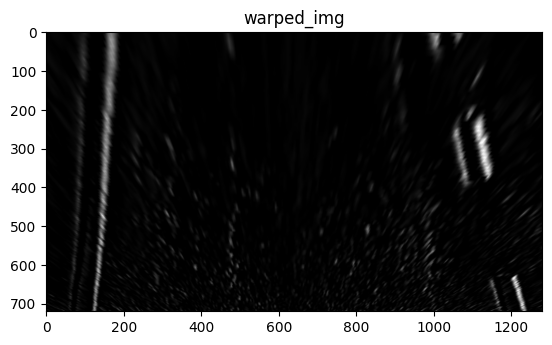

In [8]:
# Perform bird's eye view perspective transformation
warped_img, matrix = bird_eye_view(prewitt_edges, src_mask, dst_mask)

plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))
plt.title('warped_img')
plt.show()

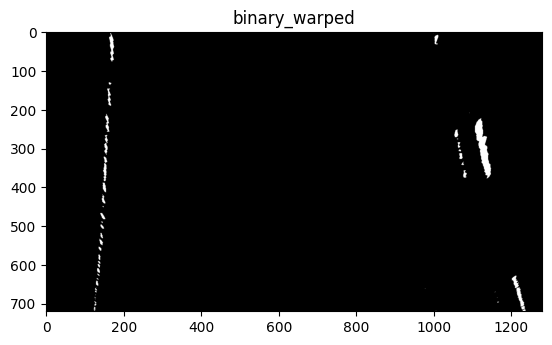

In [9]:
# Binarize the transformed image
binary_warped = binarize_image(warped_img)

plt.imshow(cv2.cvtColor(binary_warped, cv2.COLOR_BGR2RGB))
plt.title('binary_warped')
plt.show()